In [1]:
# Import packages
import pandas as pd
#import fiona, folium
#import geopandas as gpd
#import pysal as ps
import sklearn
import sys,os
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline
import numpy as np
from shapely.geometry import Polygon
print("Importing packages..")

Importing packages..


In [2]:
font = {'family' : 'Arial',
        'size'   : 12}
plt.rcParams['figure.figsize'] = [15.00,10.00]
plt.rc('font', **font)
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
#Read MAG data for 2016
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/"
mag_counts = pd.read_csv(path + "Model Input/MAG2015-2016 Bike counts summary.csv")
mag_counts[["Agency","Avg Weekday","Avg Weekend"]].groupby(["Agency"],as_index=False).mean()

,Agency,Avg Weekday,Avg Weekend
0,Avondale,10.000000,14.000000
1,Carefree,40.000000,74.000000
2,Chandler,157.666667,164.333333
3,Gilbert,106.000000,102.333333
4,Glendale,42.666667,51.333333
5,Litchfield Park,9.000000,9.000000
6,Maricopa County,19.000000,33.000000
7,Mesa,87.200000,95.200000
8,Peoria,129.333333,161.000000
9,Phoenix,67.428571,71.071429


In [4]:
df = mag_counts[["Agency","Avg Weekday","Avg Weekend"]].groupby(["Agency"],as_index=False).mean()
df["Avg Bicyclists"] = (df["Avg Weekday"] + df["Avg Weekend"])/2
df = df.query("Agency!='Maricopa County'")
df["Rank"] = [9,13,3,6,5,11,2,8,1,10,4,7]
df = df.sort_values(by=['Rank'])
df

,Agency,Avg Weekday,Avg Weekend,Avg Bicyclists,Rank
9,Phoenix,67.428571,71.071429,69.250000,1
7,Mesa,87.200000,95.200000,91.200000,2
2,Chandler,157.666667,164.333333,161.000000,3
11,Scottsdale,93.666667,143.000000,118.333333,4
4,Glendale,42.666667,51.333333,47.000000,5
3,Gilbert,106.000000,102.333333,104.166667,6
12,Tempe,106.000000,148.000000,127.000000,7
8,Peoria,129.333333,161.000000,145.166667,8
0,Avondale,10.000000,14.000000,12.000000,9
10,Queen Creek,24.000000,36.000000,30.000000,10


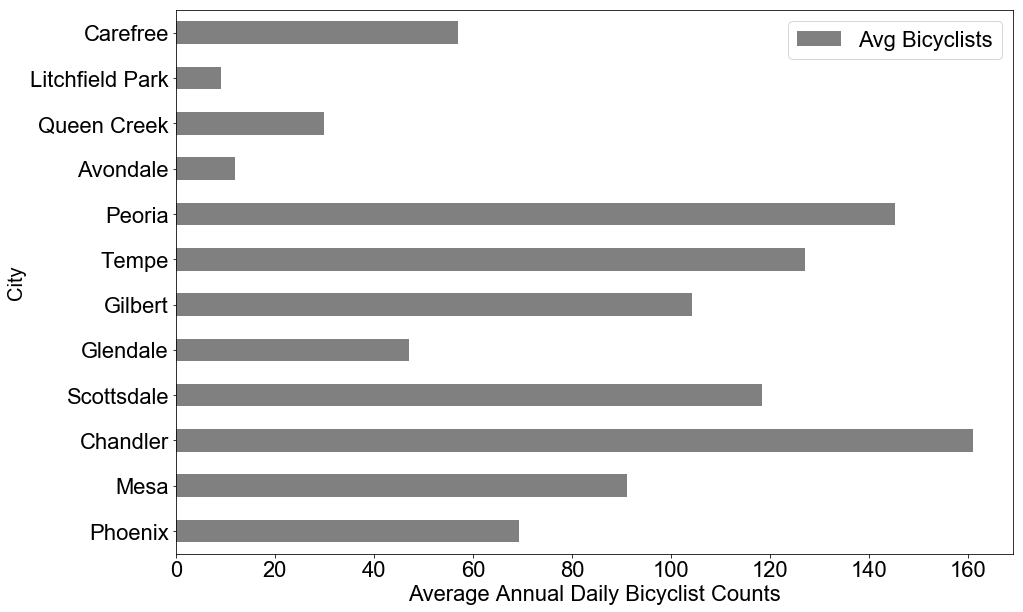

In [6]:
import os
os.chdir("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Images")
ax = df.plot(x = "Agency", y = "Avg Bicyclists", kind="barh", figsize = [15,10], color = "grey")
ax.set_xlabel("Average Annual Daily Bicyclist Counts",size =22)
ax.set_ylabel("City",size =20)
fig = ax.get_figure()
plt.savefig("Avg_cyclists_MAG.png",dpi=270,bbox_inches = 'tight')

In [4]:
#Read the nodes in Strava 
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016"
mag_strava_nodes = pd.read_csv(path + "/Analysis_Generated_Data/MAG_Strava_Bikecount_Comparisons_2015-2016/Strava-MAG-node-list-startday_2015-16.csv")
mag_strava_nodes.head()

,Site ID_MAG,Strava_Node_ID,Start_day
0,1,57040,132
1,1,57040,132
2,1,57040,132
3,1,57040,132
4,1,57040,132


In [9]:
# Read Strava data for all nodes
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016"
strava_mag_nodes_rollup_total = pd.read_csv(path + "/maricopa_2016_ride/Nodes/maricopa_2016_ride_nodes_rollup_total.csv")
strava_mag_nodes_datetime = pd.read_csv(path + "/maricopa_2016_ride/Nodes/maricopa_osm_edges_metro_nodes_data.csv")
strava_nodes_list = mag_strava_nodes["Strava_Node_ID"].tolist()

In [9]:
strava_mag_nodes_rollup_total.head()

,node_id,athcnt_0,actcnt_0,cmtcnt_0,pct_0_0,pct_025_0,pct_05_0,pct_075_0,pct_1_0,athcnt_1,...,pct_075_9,pct_1_9,athcnt,actcnt,cmtcnt,pct_0,pct_025,pct_05,pct_075,pct_1
0,3,0,0,0,-1,-1.0,-1.0,-1.00,-1,0,...,-1.0,-1,1,1,1,56,56.0,56.0,56.00,56
1,9,6,6,6,2,3.0,3.0,3.75,5,0,...,-1.0,-1,7,7,7,0,2.5,3.0,3.50,5
2,10,0,0,0,-1,-1.0,-1.0,-1.00,-1,0,...,-1.0,-1,10,10,9,0,0.0,1.0,3.75,5
3,11,0,0,0,-1,-1.0,-1.0,-1.00,-1,0,...,-1.0,-1,3,3,3,0,1.0,2.0,3.50,5
4,13,0,0,0,-1,-1.0,-1.0,-1.00,-1,0,...,-1.0,-1,2,2,2,0,0.0,0.0,0.00,0


In [10]:
strava_mag_nodes_datetime.head()

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count
0,322560,2016,255,8,28,1,1,5,5,5,0
1,302339,2016,118,10,29,1,1,8,8,8,0
2,100747,2016,2,11,14,1,1,2,2,2,1
3,302339,2016,197,19,33,1,1,0,0,0,0
4,100747,2016,3,12,46,1,1,3,3,3,1


In [11]:
# Filter the nodes from Strava that are in the vicinity of the official bike count locations
strava_mag_nodes_official_total = strava_mag_nodes_rollup_total[strava_mag_nodes_rollup_total["node_id"].isin(strava_nodes_list)]
strava_mag_nodes_official_datetime = strava_mag_nodes_datetime[strava_mag_nodes_datetime["node_id"].isin(strava_nodes_list)]

In [45]:
strava_mag_nodes_official_total.columns

Index([u'node_id', u'athcnt_0', u'actcnt_0', u'cmtcnt_0', u'pct_0_0',
       u'pct_025_0', u'pct_05_0', u'pct_075_0', u'pct_1_0', u'athcnt_1',
       u'actcnt_1', u'cmtcnt_1', u'pct_0_1', u'pct_025_1', u'pct_05_1',
       u'pct_075_1', u'pct_1_1', u'athcnt_2', u'actcnt_2', u'cmtcnt_2',
       u'pct_0_2', u'pct_025_2', u'pct_05_2', u'pct_075_2', u'pct_1_2',
       u'athcnt_3', u'actcnt_3', u'cmtcnt_3', u'pct_0_3', u'pct_025_3',
       u'pct_05_3', u'pct_075_3', u'pct_1_3', u'athcnt_4', u'actcnt_4',
       u'cmtcnt_4', u'pct_0_4', u'pct_025_4', u'pct_05_4', u'pct_075_4',
       u'pct_1_4', u'athcnt_5', u'actcnt_5', u'cmtcnt_5', u'pct_0_5',
       u'pct_025_5', u'pct_05_5', u'pct_075_5', u'pct_1_5', u'athcnt_6',
       u'actcnt_6', u'cmtcnt_6', u'pct_0_6', u'pct_025_6', u'pct_05_6',
       u'pct_075_6', u'pct_1_6', u'athcnt_7', u'actcnt_7', u'cmtcnt_7',
       u'pct_0_7', u'pct_025_7', u'pct_05_7', u'pct_075_7', u'pct_1_7',
       u'athcnt_8', u'actcnt_8', u'cmtcnt_8', u'pct_0_8', u'pct_0

In [22]:
strava_mag_nodes_official_total.to_csv(path + "/strava_nodes_total_rollup_counts_for_MAG_locations.csv")

In [20]:
strava_mag_nodes_official_datetime.head()

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count
842056,284962,2016,1,14,20,1,1,2,2,2,0
842057,284962,2016,1,14,19,1,1,30,30,30,0
842058,284962,2016,1,16,21,1,1,0,0,0,0
842059,284962,2016,1,12,58,1,1,24,24,24,0
842060,284962,2016,2,8,36,1,1,0,0,0,0


In [23]:
strava_mag_nodes_official_datetime.to_csv(path+"/strava_nodes_hourly_data_for_MAG_locations.csv")

In [24]:
strava_mag_nodes_official_total.columns

Index([u'node_id', u'athcnt_0', u'actcnt_0', u'cmtcnt_0', u'pct_0_0',
       u'pct_025_0', u'pct_05_0', u'pct_075_0', u'pct_1_0', u'athcnt_1',
       u'actcnt_1', u'cmtcnt_1', u'pct_0_1', u'pct_025_1', u'pct_05_1',
       u'pct_075_1', u'pct_1_1', u'athcnt_2', u'actcnt_2', u'cmtcnt_2',
       u'pct_0_2', u'pct_025_2', u'pct_05_2', u'pct_075_2', u'pct_1_2',
       u'athcnt_3', u'actcnt_3', u'cmtcnt_3', u'pct_0_3', u'pct_025_3',
       u'pct_05_3', u'pct_075_3', u'pct_1_3', u'athcnt_4', u'actcnt_4',
       u'cmtcnt_4', u'pct_0_4', u'pct_025_4', u'pct_05_4', u'pct_075_4',
       u'pct_1_4', u'athcnt_5', u'actcnt_5', u'cmtcnt_5', u'pct_0_5',
       u'pct_025_5', u'pct_05_5', u'pct_075_5', u'pct_1_5', u'athcnt_6',
       u'actcnt_6', u'cmtcnt_6', u'pct_0_6', u'pct_025_6', u'pct_05_6',
       u'pct_075_6', u'pct_1_6', u'athcnt_7', u'actcnt_7', u'cmtcnt_7',
       u'pct_0_7', u'pct_025_7', u'pct_05_7', u'pct_075_7', u'pct_1_7',
       u'athcnt_8', u'actcnt_8', u'cmtcnt_8', u'pct_0_8', u'pct_0

In [26]:
strava_mag_nodes_official_total[["node_id","athcnt_0","athcnt_1","athcnt_2","athcnt_3","athcnt_4","athcnt_5","athcnt_6","athcnt_7","athcnt_8","athcnt_9","athcnt"]].query("node_id==57040")

,node_id,athcnt_0,athcnt_1,athcnt_2,athcnt_3,athcnt_4,athcnt_5,athcnt_6,athcnt_7,athcnt_8,athcnt_9,athcnt
40290,57040,15,15,18,21,17,13,2,5,5,3,64


In [27]:
strava_mag_nodes_official_datetime.columns

Index([u'node_id', u'year', u'day', u'hour', u'minute', u'athletes',
       u'activities', u'median_intersection_time', u'max_intersection_time',
       u'min_intersection_time', u'commute_count'],
      dtype='object')

In [46]:
strava_mag_nodes_official_datetime[["node_id","year","day","hour","minute","athletes"]].query("node_id==57040 & day== 132").groupby(["node_id","year","day","hour","minute"],as_index=False).sum()

,node_id,year,day,hour,minute,athletes


In [30]:
# Select the sum of athletes for a monthly count for the node from Strava
strava_mag_nodes_official_datetime[["node_id","year","day","hour","athletes"]].query("").groupby(["node_id","day","hour"]).sum()

year  athletes
node_id day hour                
14183   257 19    2016         1
39727   1   11    2016         1
        2   16    2016         1
        3   7     2016         1
        5   4     2016         1
        9   11    2016         1
        10  7     2016         1
        11  16    2016         1
        12  4     2016         1
            6     2016         1
            18    2016         1
        13  19    2016         4
        14  3     2016         1
            4     2016         1
        15  6     2016         1
        16  12    2016         2
        17  7     2016         1
            11    2016         1
        19  4     2016         1
            7     2016         1
        20  18    2016         3
        21  4     2016         1
        23  7     2016         1
            11    2016         2
            12    2016         1
            13    2016         1
        24  8     2016         1
        25  15    2016         1
        27  19    2016         4
        30  7     2016         1
...                ...       ...
361067  364 3     2016         1
            4     2016         1
            5     8064         7
            6     6048         4
            7     4032         6
            9     4032         2
            10    2016         1
            11    6048         3
            12    6048         6
            13    6048         3
            14    6048         3
            15    2016         1
            16    4032         3
            17    2016         1
            19    2016         1
        365 5     2016         1
            6     2016         1
            7     2016         2
            8     2016         1
            9     4032         2
            10    4032         2
            11    4032         2
            12    4032         3
            13    2016         4
            15    2016         1
        366 6     2016         1
            7     4032         7
            10    8064         7
            11    4032         2
            14    8064         4

[210052 rows x 2 columns]

In [53]:
# If no of days start with 1 ,then days in may start from 122
"""
Wed, May 11, 2016 = 132
Thu, May 12, 2016 = 133
Fri, May 13, 2016 = 134
Sat, May 14, 2016 = 135
Sun, May 15, 2016 = 136
Mon, May 16, 2016 = 137
Tue, May 17, 2016 = 138
Wed, May 18, 2016 = 139
Thu, May 19, 2016 = 140
Fri, May 20, 2016 = 141
Sat, May 21, 2016 = 142
Sun, May 22, 2016 = 143
Mon, May 23, 2016 = 144

"""
df1 = strava_mag_nodes_official_datetime.query("node_id==57040")
df2 = strava_mag_nodes_official_total.query("node_id==57040")
df1.query("day>=132 & day<=144")

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count
22648170,57040,2016,135,7,2,2,2,0,0,0,0
22648171,57040,2016,135,6,58,1,1,20,20,20,0
22648172,57040,2016,137,13,58,1,1,0,0,0,0
22648173,57040,2016,142,7,31,1,1,0,0,0,0
22648174,57040,2016,143,6,49,1,1,0,0,0,0


In [56]:
#Since all the days for which we have MAG data are not present in this node, 
#we connsider 4 other adjacent Strava nodes to check for these days
node_list = [56786,57034,57363,57039]
df3 = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"].isin(node_list)]
df3.query("day>=132 & day<=144")

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count


In [36]:
#Figure out the missing dates from the edges data instead
strava_edges_2016_rollup_total = pd.read_csv(path + "/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_total.csv")
strava_edges_2016_datetime = pd.read_csv(path + "/maricopa_2016_ride/Edges/maricopa_osm_edges_metro_edges_data.csv")

In [57]:
df = strava_edges_2016_datetime[strava_edges_2016_datetime["edge_id"].isin([936289,887681,887680,905976,905977,936288])]
df.query("day>=132 & day<=144")

,edge_id,year,day,hour,minute,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_activity_count,activity_time,rev_activity_time,commute_count
40349236,936289,2016,135,6,59,1,0,1,0,1,487.731855,NaN,0
40349237,936289,2016,135,6,55,1,0,1,0,1,463.160502,NaN,0
54033901,905977,2016,135,7,2,0,1,0,1,1,NaN,8.857644,0


In [39]:
strava_edges_2016_datetime.columns

Index([u'edge_id', u'year', u'day', u'hour', u'minute', u'athlete_count',
       u'rev_athlete_count', u'activity_count', u'rev_activity_count',
       u'total_activity_count', u'activity_time', u'rev_activity_time',
       u'commute_count'],
      dtype='object')

In [43]:
df = strava_edges_2016_datetime[strava_edges_2016_datetime["edge_id"].isin([936289,887681,887680,905976,905977,936288])]
df.query("day>=132 & day<=144").groupby(["edge_id","day","hour"]).sum()

,,,year,minute,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_activity_count,activity_time,rev_activity_time,commute_count
edge_id,day,hour,,,,,,,,,,
905977,135,7,2016,2,0,1,0,1,1,NaN,8.857644,0
936289,135,6,4032,114,2,0,2,0,2,950.892357,NaN,0


In [682]:
# Read the MAG official data
path = "C:/Users/aroy29/\Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/MAG_Strava_Bikecount_Comparisons_2015-2016/"
mag2016_oth = pd.read_csv(path + "PHX Bike Studies Data -Other.csv")
mag2016_phx = pd.read_csv(path + "PHX Bike Studies Data -Phoenix_Tempe_Mesa.csv")

mag2016_phx["datetime"] = pd.to_datetime(mag2016_phx["timestamp"])
mag2016_phx = mag2016_phx.query("year==2015 | year==2016")
mag2016_oth["datetime"] = pd.to_datetime(mag2016_oth["timestamp"])
mag2016_oth = mag2016_oth.query("year==2015 | year==2016")
mag2016_phx["day"] = pd.to_datetime(mag2016_phx["timestamp"]).dt.day
mag2016_oth["day"] = pd.to_datetime(mag2016_oth["timestamp"]).dt.day
mag2016_phx["month"] = pd.to_datetime(mag2016_phx["timestamp"]).dt.month
mag2016_oth["month"] = pd.to_datetime(mag2016_oth["timestamp"]).dt.month

In [683]:
# Code to create hourly counts form MAG data
import math
total_count = []
for index,row in mag2016_phx.iterrows():
    if(math.isnan(row["Intersection_North_IN"])):
        if(math.isnan(row["Intersection_East_IN"])):
            if(math.isnan(row["Path_IN"])):
                if(math.isnan(row["Bridge_IN"])):
                    count = 0
                else:
                    count = row["Bridge_IN"] + row["Bridge_OUT"]
            else:
                count = row["Path_IN"] + row["Path_OUT"]
        else:
            count = row["Intersection_East_IN"] + row["Intersection_East_OUT"] + row["Intersection_West_IN"] + row["Intersection_West_OUT"]
    else:
        count = row["Intersection_North_IN"] + row["Intersection_North_OUT"] + row["Intersection_South_IN"] + row["Intersection_South_OUT"]
    total_count.append(count)
mag2016_phx["total_count"] = total_count
total_count = []
for index,row in mag2016_oth.iterrows():
    if(math.isnan(row["Intersection_North_IN"])):
        if(math.isnan(row["Intersection_East_IN"])):
            if(math.isnan(row["Path_IN"])):
                if(math.isnan(row["Bridge_IN"])):
                    count = 0
                else:
                    count = row["Bridge_IN"] + row["Bridge_OUT"]
            else:
                count = row["Path_IN"] + row["Path_OUT"]
        else:
            count = row["Intersection_East_IN"] + row["Intersection_East_OUT"] + row["Intersection_West_IN"] + row["Intersection_West_OUT"]
    else:
        count = row["Intersection_North_IN"] + row["Intersection_North_OUT"] + row["Intersection_South_IN"] + row["Intersection_South_OUT"]
    total_count.append(count)
mag2016_oth["total_count"] = total_count

In [684]:
# Code to break up MAG counts as per Strava peak periods
mag2016_phx = mag2016_phx.set_index("datetime")
mag2016_oth = mag2016_oth.set_index("datetime")
mag2016_phx.head()

,site_ID,timestamp,intersection_name,year,Intersection_North_IN,Intersection_North_OUT,Intersection_South_IN,Intersection_South_OUT,Intersection_East_IN,Intersection_East_OUT,...,Bridge_OUT,City,Sidewalk_factor,latitude,longitude,data_source,facility_type,student,comments,total_count
datetime,,,,,,,,,,,,,,,,,,,,,
2015-11-04 00:00:00,40,"Wed, Nov 4, 2015 12:00 AM",Ellsworth Rd & McLellan Rd,2015,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,Mesa,0.328,33.444318,-111.632847,MAG,Bike Lane,Avipsa Roy,NaN,0.0
2015-11-04 01:00:00,40,"Wed, Nov 4, 2015 1:00 AM",Ellsworth Rd & McLellan Rd,2015,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,Mesa,0.328,33.444318,-111.632847,MAG,Bike Lane,Avipsa Roy,NaN,0.0
2015-11-04 02:00:00,40,"Wed, Nov 4, 2015 2:00 AM",Ellsworth Rd & McLellan Rd,2015,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,Mesa,0.328,33.444318,-111.632847,MAG,Bike Lane,Avipsa Roy,NaN,0.0
2015-11-04 03:00:00,40,"Wed, Nov 4, 2015 3:00 AM",Ellsworth Rd & McLellan Rd,2015,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,Mesa,0.328,33.444318,-111.632847,MAG,Bike Lane,Avipsa Roy,NaN,0.0
2015-11-04 04:00:00,40,"Wed, Nov 4, 2015 4:00 AM",Ellsworth Rd & McLellan Rd,2015,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,Mesa,0.328,33.444318,-111.632847,MAG,Bike Lane,Avipsa Roy,NaN,0.0


In [782]:
# Replace the site_ID and dates to get a 2.5 hr time interval count for each location --- need to improve code
df = mag2016_oth.query("site_ID==104 & day==30 & month==11")[["total_count"]]
df.groupby(pd.TimeGrouper(freq='150Min')).sum()

,total_count
datetime,
2015-11-30 00:00:00,0.0
2015-11-30 02:30:00,0.0
2015-11-30 05:00:00,2.0
2015-11-30 07:30:00,1.0
2015-11-30 10:00:00,0.0
2015-11-30 12:30:00,2.0
2015-11-30 15:00:00,0.0
2015-11-30 17:30:00,0.0
2015-11-30 20:00:00,1.0


In [807]:
# Comparison of MAG count locations with Strava nodes
node_id,athcnt_0,athcnt_1,athcnt_2,athcnt_3 = [],[],[],[],[]
athcnt_4,athcnt_5,athcnt_6,athcnt_7,athcnt_8,athcnt_9 = [],[],[],[],[],[]
strava_nodes = pd.read_csv(path + "Strava_MAG_site_node_list_2015_16.csv").Strava_Node_ID
#for all the nodes in the list take a count of the peak periods from strava
x = strava_mag_nodes_official_total[strava_mag_nodes_official_total["node_id"].isin(strava_nodes)]
node_id = x.node_id
athcnt_0 = x.athcnt_0
athcnt_1 = x.athcnt_1
athcnt_2 = x.athcnt_2
athcnt_3 = x.athcnt_3
athcnt_4 = x.athcnt_4
athcnt_5 = x.athcnt_5
athcnt_6 = x.athcnt_6
athcnt_7 = x.athcnt_7
athcnt_8 = x.athcnt_8
athcnt_9 = x.athcnt_9
    
df = pd.DataFrame({'node_id': node_id, 'athcnt_0': athcnt_0, 'athcnt_1': athcnt_1, 'athcnt_2': athcnt_2,
                   'athcnt_3': athcnt_3, 'athcnt_4':athcnt_4, 'athcnt_5': athcnt_5,'athcnt_6':athcnt_6,
                   'athcnt_7': athcnt_7, 'athcnt_8':athcnt_8, 'athcnt_9': athcnt_9})
df.head()

,athcnt_0,athcnt_1,athcnt_2,athcnt_3,athcnt_4,athcnt_5,athcnt_6,athcnt_7,athcnt_8,athcnt_9,node_id
5969,1,0,0,0,0,0,0,0,0,0,14183
26717,63,31,27,35,68,27,11,12,15,55,39727
34822,10,2,4,7,17,5,7,6,3,1,49782
37391,78,108,190,259,299,118,42,34,35,27,53139
37392,85,152,199,260,261,125,46,33,28,20,53140


In [814]:
df.to_csv(path+"Strava_yearly_peak_periods_2016.csv")

In [1085]:
#The above results give a yearly round up for the Strava peak period counts in 2016
#If we know the months for which we want to compare the Strava data
strava_275996 = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==275996]
strava_275996 = strava_275996.query("day>=132 & day<=144")
strava_276025 = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==276025]
strava_276025 = strava_276025.query("day>=132 & day<=144")

In [1086]:
# Convert Strava data to timsetamp and interpolate to generate continuous data at regular intervals
def day_to_mm(x):
    month = 0
    if (x in np.arange(1,32)):
        month = 1
    elif (x in np.arange(32,61)):
         month = 2
    elif (x in np.arange(61,92)):
         month = 3
    elif (x in np.arange(92,123)):
        month = 4
    elif (x in np.arange(123,153)):
        month = 5
    elif(x in np.arange(153,183)):
        month = 6
    elif(x in range(183,214)):
        month = 7
    elif(x in range(214,245)):
        month = 8
    elif(x in range(245,275)):
        month = 9
    elif(x in range(275,306)):
        month = 10
    elif(x in range(306,336)):
        month = 11
    elif(x in range (336,367)):
        month = 12
    return month

def day_to_dd(x):
    date = 0
    if (x in np.arange(1,32)):
        date = x
    elif (x in np.arange(32,61)):
        date = x-31
    elif (x in range(61,92)):
        date = x-60
    elif (x in range(92,123)):
        date = x-91
    elif (x in range(123,153)):
        date = x-121
    elif(x in range(153,183)):
        date = x - 152
    elif(x in range(183,214)):
        date = x - 182
    elif(x in range(214,245)):
        date = x - 213
    elif(x in range(245,275)):
        date = x - 244
    elif(x in range(275,306)):
        date = x - 274
    elif(x in range(306,336)):
        date = x - 305
    elif(x in range (336,367)):
        date = x - 335
    return date

month1,date1 = [],[]
month1 = strava_275996["day"].apply(lambda x: day_to_mm(int(x)))
date1 = strava_275996["day"].apply(lambda x: day_to_dd(int(x)))
strava_275996['month'] = month1
strava_275996['date'] = date1

strava_275996.head()

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count,month,date
52506576,275996,2016,132,6,47,1,1,4,4,4,0,5,11
52506577,275996,2016,132,8,42,2,2,9,9,9,0,5,11
52506578,275996,2016,132,8,11,2,2,8,8,7,0,5,11
52506579,275996,2016,132,8,39,1,1,7,7,7,0,5,11
52506580,275996,2016,132,9,31,1,1,5,5,5,0,5,11


In [1087]:
# Sort the dataframe by timestamp, setting an index on the datetime column
strava_275996 = strava_275996[["year","month","date","hour","minute","athletes"]]
strava_275996["day"] = strava_275996.date
timestamp = pd.to_datetime(strava_275996[["year","month","day","hour","minute"]])
strava_275996["timestamp"] = timestamp
strava_275996 = strava_275996[["timestamp","athletes"]]
strava_275996.set_index('timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
strava_275996 = strava_275996.sort_index()
strava_275996.head()

,athletes
timestamp,
2016-05-11 06:47:00,1
2016-05-11 07:21:00,1
2016-05-11 08:11:00,2
2016-05-11 08:39:00,1
2016-05-11 08:42:00,2


In [1088]:
month1,date1 = [],[]
month1 = strava_276025["day"].apply(lambda x: day_to_mm(int(x)))
date1 = strava_276025["day"].apply(lambda x: day_to_dd(int(x)))
strava_276025['month'] = month1
strava_276025['date'] = date1

strava_276025.head()

,node_id,year,day,hour,minute,athletes,activities,median_intersection_time,max_intersection_time,min_intersection_time,commute_count,month,date
60791547,276025,2016,132,5,55,1,1,3,3,3,0,5,11
60791548,276025,2016,132,8,42,2,2,7,10,4,0,5,11
60791549,276025,2016,132,8,11,2,2,10,10,9,0,5,11
60791550,276025,2016,132,8,39,1,1,9,9,9,0,5,11
60791551,276025,2016,132,9,31,1,1,1,1,1,0,5,11


In [1089]:
strava_276025 = strava_276025[["year","month","date","hour","minute","athletes"]]
strava_276025["day"] = strava_276025.date
timestamp = pd.to_datetime(strava_276025[["year","month","day","hour","minute"]])
strava_276025["timestamp"] = timestamp
strava_276025 = strava_276025[["timestamp","athletes"]]
strava_276025.set_index('timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
strava_276025 = strava_276025.sort_index()
strava_276025.head()

,athletes
timestamp,
2016-05-11 05:55:00,1
2016-05-11 07:21:00,1
2016-05-11 08:11:00,2
2016-05-11 08:39:00,1
2016-05-11 08:42:00,2


In [866]:
# Since the values for athlete counts are not continuous across all time ranges, we try to upsample the data
# Assuming Strava data is Temporally consistent and continuus across whole of Maricopa
# We try to generate time blocks of 150 mins which are continuous and replace the counts for the other
# timestamps for which Strava has no recorded value
strava_site = strava_275996[["year","month","date","hour","minute","athletes"]]
strava_275996["day"] = strava_275996.date
timestamp = pd.to_datetime(strava_275996[["year","month","day","hour","minute"]])
strava_275996["timestamp"] = timestamp
strava_275996 = strava_275996[["timestamp","athletes"]]
strava_275996.set_index('timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
strava_275996 = strava_275996.sort_index()

In [1090]:
node1_site6 = strava_275996['2016-05-11 00:00:00':'2016-05-11 23:59:59'].athletes.resample('150min').sum().ffill()

node2_site6 = strava_276025['2016-05-11 00:00:00':'2016-05-11 23:59:59'].athletes.resample('150min').sum().ffill()

node1_site6 + node2_site6

timestamp
2016-05-11 05:00:00     4
2016-05-11 07:30:00    16
2016-05-11 10:00:00     6
2016-05-11 12:30:00     2
2016-05-11 15:00:00     2
Freq: 150T, Name: athletes, dtype: int64

In [935]:
node1_site6 = strava_275996['2016-05-23 00:00:00':'2016-05-23 23:59:00'].athletes.resample('150min').sum().ffill()

node2_site6 = strava_275996['2016-05-23 00:00:00':'2016-05-23 23:59:00'].athletes.resample('150min').sum().ffill()

node1_site6 + node2_site6

timestamp
2016-05-23 07:30:00    14.0
2016-05-23 10:00:00     6.0
2016-05-23 12:30:00     2.0
2016-05-23 15:00:00     2.0
2016-05-23 17:30:00     2.0
Freq: 150T, Name: athletes, dtype: float64

In [6]:
def day_to_mm(x):
    month = 0
    if (x in np.arange(1,32)):
        month = 1
    elif (x in np.arange(32,61)):
         month = 2
    elif (x in np.arange(61,92)):
         month = 3
    elif (x in np.arange(92,122)):
        month = 4
    elif (x in np.arange(122,153)):
        month = 5
    elif(x in np.arange(153,183)):
        month = 6
    elif(x in range(183,214)):
        month = 7
    elif(x in range(214,245)):
        month = 8
    elif(x in range(245,275)):
        month = 9
    elif(x in range(275,306)):
        month = 10
    elif(x in range(306,336)):
        month = 11
    elif(x in range (336,367)):
        month = 12
    return month

def day_to_dd(x):
    date = 0
    if (x in np.arange(1,32)):
        date = x
    elif (x in np.arange(32,61)):
        date = x-31
    elif (x in range(61,92)):
        date = x-60
    elif (x in range(92,122)):
        date = x-91
    elif (x in range(122,153)):
        date = x-121
    elif(x in range(153,183)):
        date = x - 152
    elif(x in range(183,214)):
        date = x - 182
    elif(x in range(214,245)):
        date = x - 213
    elif(x in range(245,275)):
        date = x - 244
    elif(x in range(275,306)):
        date = x - 274
    elif(x in range(306,336)):
        date = x - 305
    elif(x in range (336,367)):
        date = x - 335
    return date

def create_timestamps(df):
    #Create a timeseries with the filtered data
    month1,date1 = [],[]
    month1 = df["day"].apply(lambda x: day_to_mm(int(x)))
    date1 = df["day"].apply(lambda x: day_to_dd(int(x)))
    df['month'] = month1
    df['date'] = date1
    df = df[["year","month","date","hour","minute","athletes"]]
    df["day"] = df["date"]
    timestamp = pd.to_datetime(df[["year","month","day","hour","minute"]])
    df["timestamp"] = timestamp
    df = df[["timestamp","athletes"]]
    df.set_index('timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
    df = df.sort_index() 
    return df

def node_selection_may11(node):
    #Pick the nodes in Strava which are in the vicinity of MAG sites
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    #Select the counts for those days for which we have MAG data
    df = df.query("day>=132 & day<=144") #May-11 to May-23
    #Create a timeseries with the filtered data
    #df = create_timestamps(df)
    return df
def node_selection_apr27(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=118 & day<=130") #Apr-27 to May-9
    #df = create_timestamps(df) 
    return df
def node_selection_oct7(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=281 & day<=293") #Oct-7 to Oct-19
    #df = create_timestamps(df) 
    return df
def node_selection_apr13(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=104 & day<=116") #Apr-13 to Apr-25month1,date1 = [],[]
    #df = create_timestamps(df) 
    return df
def node_selection_mar30(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=89 & day<=102") #Mar-30 to Apr-11month1,date1 = [],[]
    #df = create_timestamps(df)
    return df
def node_selection_nov4(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=309 & day<=321") #Nov-4 to Nov-16month1,date1 = [],[]
    #df = create_timestamps(df)
    return df
def node_selection_oct21(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=295 & day<=307") #Oct-21 to Nov-2month1,date1 = [],[]
    #df = create_timestamps(df) 
    return df
def node_selection_nov18(node):
    df = strava_mag_nodes_official_datetime[strava_mag_nodes_official_datetime["node_id"]==node]
    df = df.query("day>=323 & day<=342") #Nov-18 to Dec-7month1,date1 = [],[]
    #df = create_timestamps(df)
    return df



def strava_peak_period_counts_for_MAG_sites(nodes_list):
    path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/MAG_Strava_Bikecount_Comparisons_2015-2016/Strava 150 min count for MAG sites_2017-11-07/" 
    for index,row in nodes_list.iterrows():
        if (row["Start_day"]==132):
            df = node_selection_may11(row["Strava_Node_ID"])
        elif(row["Start_day"]==118):
            df = node_selection_apr27(row["Strava_Node_ID"])
        elif(row["Start_day"]==281):
            df = node_selection_apr27(row["Strava_Node_ID"])
        elif(row["Start_day"]==104):
            df = node_selection_apr13(row["Strava_Node_ID"])
        elif(row["Start_day"]==89):
            df = node_selection_apr13(row["Strava_Node_ID"])
        elif(row["Start_day"]==309):
            df = node_selection_nov4(row["Strava_Node_ID"])
        elif(row["Start_day"]==295):
            df = node_selection_oct21(row["Strava_Node_ID"])
        elif(row["Start_day"]==323):
            df = node_selection_nov18(row["Strava_Node_ID"])
        else:
            print("Check the Start Day")
        if (len(df)!=0):
            month1,date1 = [],[]
            month1 = df["day"].apply(lambda x: day_to_mm(int(x)))
            date1 = df["day"].apply(lambda x: day_to_dd(int(x)))
            df['month'] = month1
            df['date'] = date1
            df = df[["year","month","date","hour","minute","athletes"]]
            df["day"] = df["date"]
            timestamp = pd.to_datetime(df[["year","month","day","hour","minute"]])
            df["timestamp"] = timestamp
            df = df[["timestamp","athletes"]]
            df.set_index('timestamp', drop=True, append=False, inplace=True, verify_integrity=False)
            df = df.sort_index()
            df = df[df.index[0]:df.index[len(df)-1]].athletes.resample('150min').sum().ffill()
        #df = df.sum().ffill()
        df.to_csv(path+str(row["Strava_Node_ID"])+"_strava_150min_interval_counts_for_MAG_locations.csv")    
    return("Files written successfully!")

In [7]:
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/MAG_Strava_Bikecount_Comparisons_2015-2016"
nodes_list = pd.read_csv(path + "/Strava_MAG_site_node_list_2015_16.csv")
strava_peak_period_counts_for_MAG_sites(nodes_list)

NameError: global name 'strava_mag_nodes_official_datetime' is not defined

In [10]:
#Calculate annual TBAG counts from raw data
tbag_counts = pd.read_csv("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/TBAG2016/2016_BCdata.csv")
tbag_counts_annual = tbag_counts.groupby(["LocID"],as_index=False).sum()[["LocID","Count"]]

In [11]:
tbag_counts_annual.head()

,LocID,Count
0,101,47
1,102,231
2,103,217
3,104,99
4,105,36


In [14]:
tbag_counts_annual.to_csv("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/Model Input/TBAG_Annual_counts.csv")